#Customer Churn Prediction using ANN

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Data exploration


In [2]:
# Load the uploaded file into a DataFrame
df = pd.read_csv(('Customer-Churn.csv'))
print("File loaded successfully.")
print(df.sample(5))


File loaded successfully.
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5686  4369-HTUIF    Male              1      No         No       6   
4992  7740-KKCXF    Male              0     Yes         No      51   
6086  0916-KNFAJ    Male              0     Yes         No      61   
6630  1226-IENZN    Male              1      No         No      16   
1993  9828-AOQLM  Female              0     Yes        Yes       1   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
5686          Yes                No     Fiber optic            Yes  ...   
4992           No  No phone service             DSL             No  ...   
6086          Yes               Yes             DSL            Yes  ...   
6630          Yes                No     Fiber optic             No  ...   
1993          Yes                No             DSL             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5686               No

#Dataset Description

In [3]:
print("Dataset Overview:")
print(df.info())
print(df.describe())
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

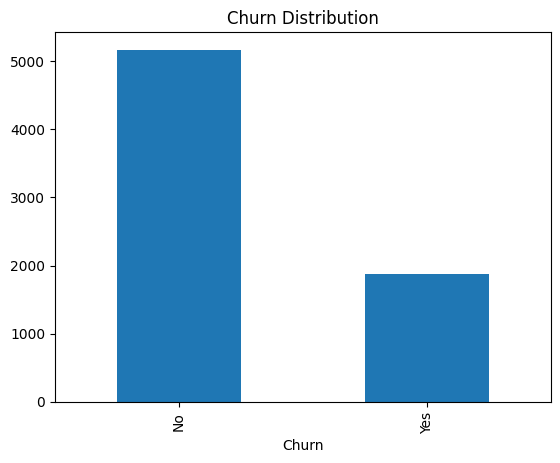

In [4]:
# Target variable distribution
df['Churn'].value_counts().plot(kind='bar', title='Churn Distribution')
plt.show()

#Data Cleaning


convert total charges strings into numbers

In [5]:
#drop the customerID column
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values
#values are in string format, we have to convert it in to numeric

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
#convert tortalcharges to number format
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]#Show the true values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:

df1=df[df.TotalCharges!=' ']#getting all the rows of totalchargers are not equal to null, into a another dataframe.
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges);

<ipython-input-12-31c61a4d232a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges);


In [13]:
df1.TotalCharges.dtypes

dtype('float64')

#Data Visualization

Find the customers that are not living with tenure

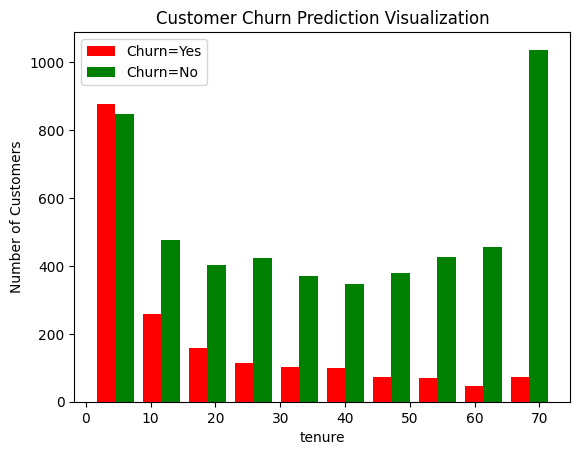

In [14]:
#tenure of customers who are not living
tenure_churn_no = df1[df1.Churn=='No'].tenure
#tenure of customers who are living
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

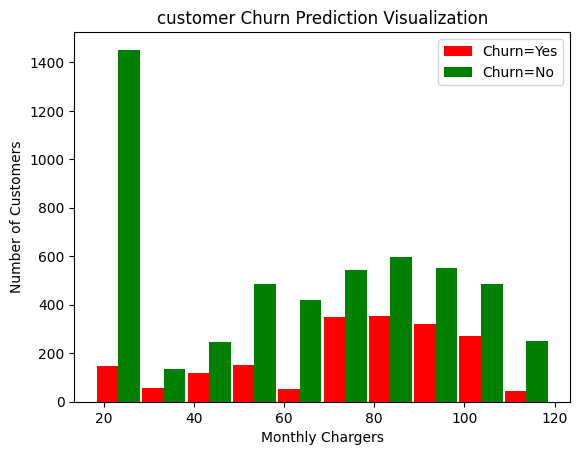

In [15]:
#Monthly Charges of customers who are not living
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
#Monthly Charges of customers who are not living
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Chargers')
plt.ylabel('Number of Customers')
plt.title('customer Churn Prediction Visualization')

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth =0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

#Encording Categorical Data

In [16]:
#get all the unique values for all categorical columns
def print_unique_col_values(df):
  for column in df:
      if df[column].dtypes=='object':
        print(f'{column}: {df1[column].unique()}')

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-17-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-17-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
#replace yes & no with 1 and 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-19-44343b1830f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [20]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [21]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-21-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [22]:
df1.gender.unique()

array([1, 0])

In [23]:
#apply one hot coding and get a new data frame
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3369,1,1,0,0,11,1,1,1,0,0,...,True,False,False,True,False,False,False,False,True,False
1852,0,0,0,0,1,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
1872,1,0,1,1,41,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False
2721,0,1,0,0,10,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4173,1,0,0,0,12,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

#Scaling Numerical Features

Scalling data to the range of 0 to 1

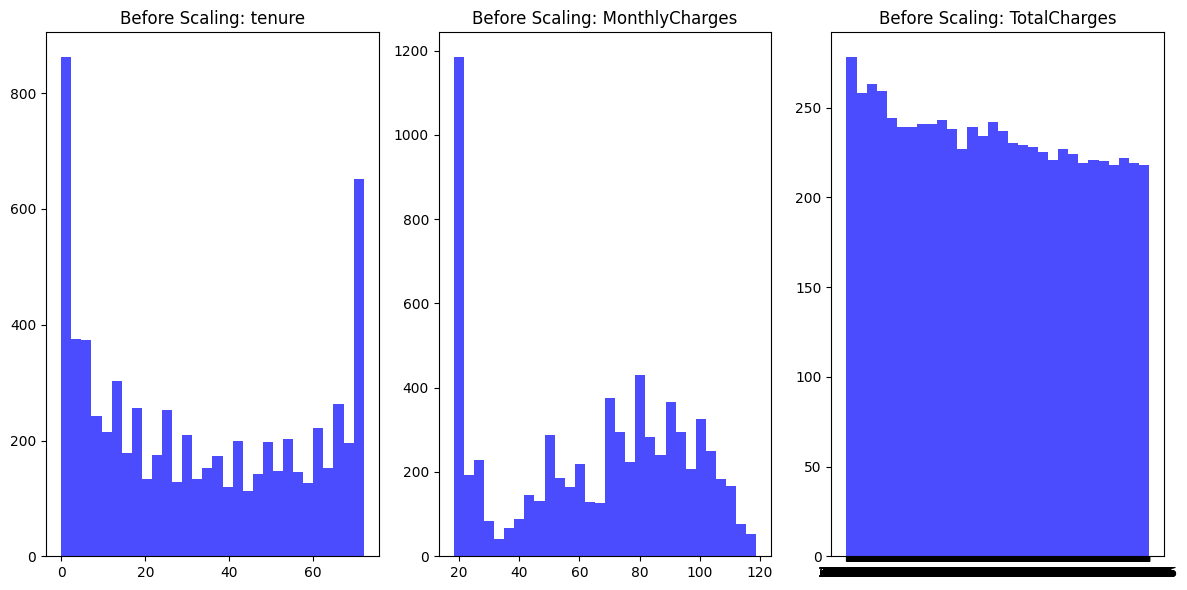

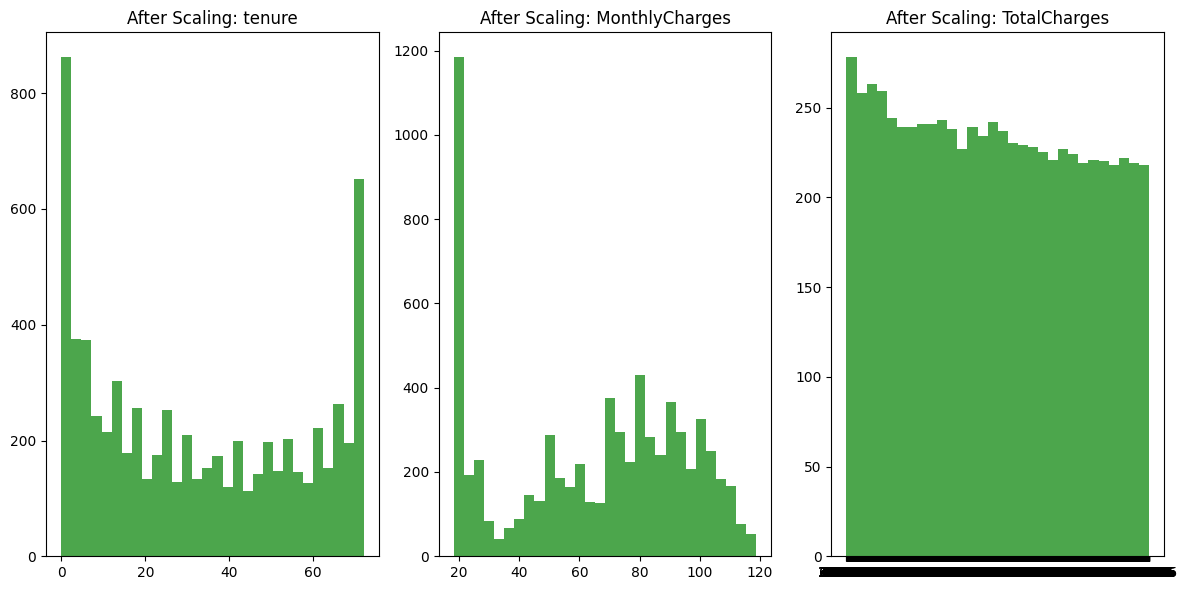

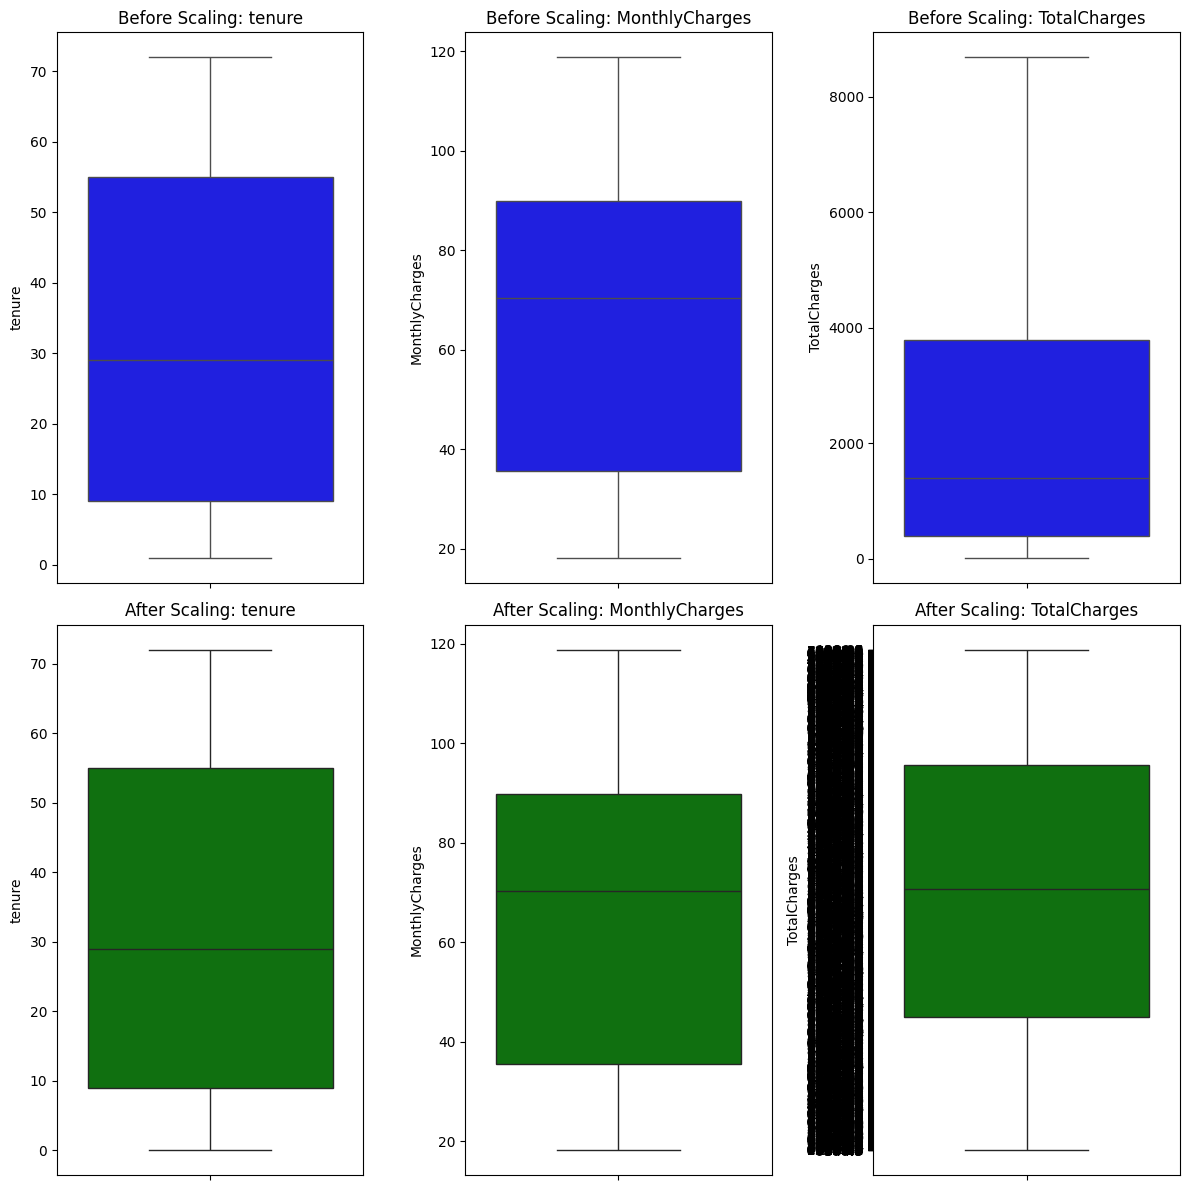

In [26]:
import seaborn as sns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

# Histograms before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols_to_scale):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)
    plt.title(f'Before Scaling: {col}')
plt.tight_layout()
plt.show()

# Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])



# Histograms after scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols_to_scale):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=30, color='green', alpha=0.7)
    plt.title(f'After Scaling: {col}')
plt.tight_layout()
plt.show()

# Box plots before and after scaling
# Reload the dataset for before scaling comparison
df_before = pd.read_csv('Customer-Churn.csv')
df_before.drop('customerID', axis='columns', inplace=True)
df_before.TotalCharges = pd.to_numeric(df_before.TotalCharges, errors='coerce')
df_before = df_before[df_before.TotalCharges.notnull()]

plt.figure(figsize=(12, 12))

# Box plots before scaling
for i, col in enumerate(cols_to_scale):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_before[col], color='blue')
    plt.title(f'Before Scaling: {col}')

# Box plots after scaling
for i, col in enumerate(cols_to_scale):
    plt.subplot(2, 3, i+4)
    sns.boxplot(y=df[col], color='green')
    plt.title(f'After Scaling: {col}')

plt.tight_layout()
plt.show()

In [27]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')
# df2.sample(5)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#Splitting data into training and testing data


In [28]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

Spliting dataset for training and testing

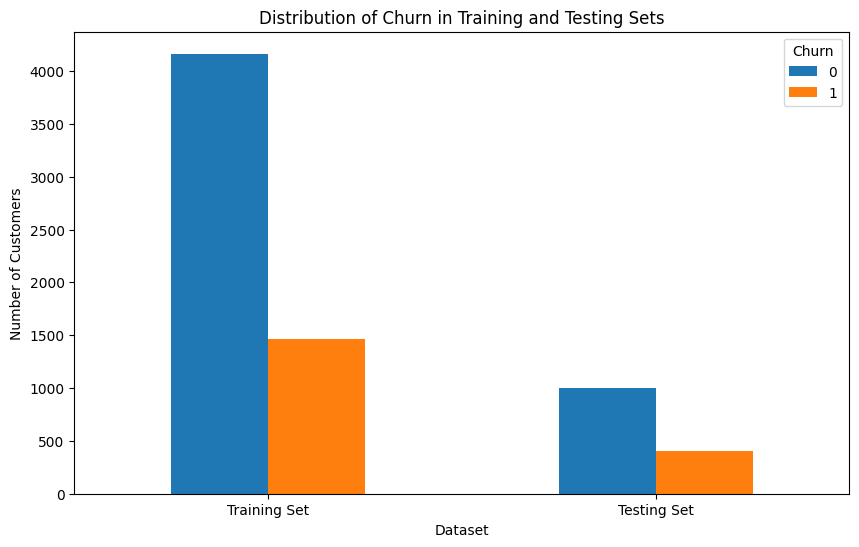

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

# Count the occurrences of each class in the training and testing sets
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Create a DataFrame for easy plotting
counts_df = pd.DataFrame({
    'Training Set': train_counts,
    'Testing Set': test_counts
}).transpose()

# Plot the counts
counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Churn in Training and Testing Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

In [30]:
x_train.shape

(5625, 26)

In [31]:
x_test.shape

(1407, 26)

In [32]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [33]:
len(  x_train.columns)

26

#Building and training the ANN model

In [35]:
#import tensorflow libraries
import tensorflow as tf
from tensorflow import keras

#create the neural network
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),#input layer
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),#output layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Convert x_train and y_train to float32
x_train = np.array(x_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5005 - accuracy: 0.7438
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.7961
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4054 - accura

#Evaluate the model

In [36]:
# Convert x_test and y_test to float32
x_test = np.array(x_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

model.evaluate(x_test, y_test)  # Now evaluate with the correctly formatted data

44/44 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7584


[0.5265997648239136, 0.7583510875701904]

#Making predictions and evaluating the results

In [37]:

yp = model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.00582268],
       [0.22773913],
       [0.03075062],
       [0.89581776],
       [0.34374467]], dtype=float32)

In [38]:
y_test[:10]

array([0., 0., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)

In [39]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


In [40]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [41]:
#getting the classification report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       999
         1.0       0.62      0.44      0.51       408

    accuracy                           0.76      1407
   macro avg       0.71      0.66      0.68      1407
weighted avg       0.74      0.76      0.74      1407



Text(95.72222222222221, 0.5, 'Truth')

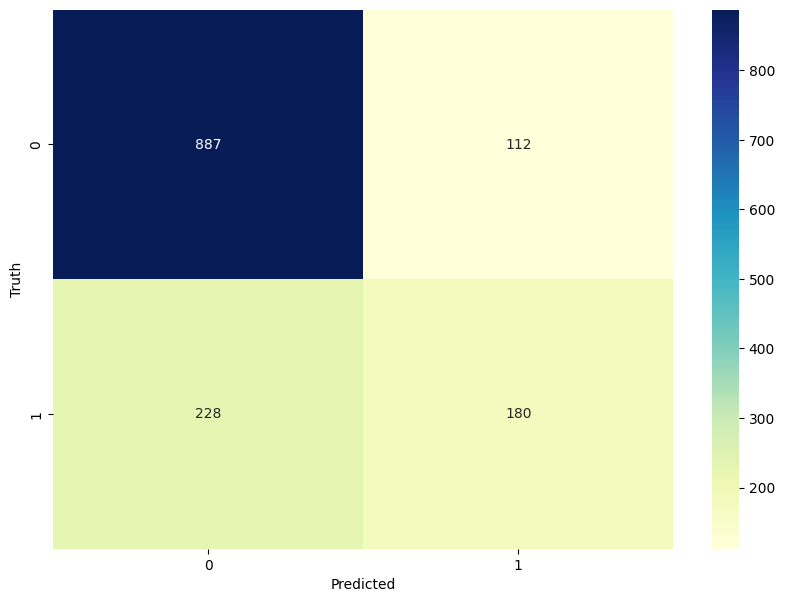

In [42]:
#getting the confusson matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')